<a href="https://colab.research.google.com/github/navneetkrc/Recommender_systems/blob/master/Restaurant%20Recommender/Collaborative_Filtering_restaurants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started
In this project, We will analyze datasets containing data on restaurants, consumers and user-item-rating. The goal of this project is to implement Collaborative Filtering i.e., to find similarities between various consumers and recommend restaurants to consumers.

The datasets for this project can be found on Kaggle.

The following code loads the datasets, along with a few of the necessary Python libraries required for this project.

Based on [Kundan Desai](https://github.com/kunaldesai97/Restaurant-Data)'s github repo.

I have just run on the Google colab to try his approach.

In [0]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

In [35]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip

--2019-10-17 12:12:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39674 (39K) [application/x-httpd-php]
Saving to: ‘RCdata.zip.1’

RCdata.zip.1        100%[===================>]  38.74K  --.-KB/s    in 0.03s   

2019-10-17 12:12:38 (1.21 MB/s) - ‘RCdata.zip.1’ saved [39674/39674]



In [36]:
!unzip /content/RCdata.zip

Archive:  /content/RCdata.zip
replace chefmozaccepts.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [65]:
print('Loading restaurant datasets')

# Load Restaurant Payment dataset
try:
    rest_pay = pd.read_csv('chefmozaccepts.csv')
    print('Payment dataset has %d samples with %d features each.' % (rest_pay.shape))
except:
    print('Payment dataset could not be loaded. Is the dataset missing?')
    
# Load the Restaurant Cuisine dataset
try:
    rest_cuisine = pd.read_csv('chefmozcuisine.csv')
    print('Cuisine dataset has %d samples with %d features each.' % (rest_cuisine.shape))
except:
    print('Cuisine dataset could not be loaded. Is the dataset missing?')
    
# Load the Restaurant Hours dataset
try:
    rest_hours = pd.read_csv('chefmozhours4.csv')
    print('Hours dataset has %d samples with %d features each.' % (rest_hours.shape))
except:
    print('Hours dataset could not be loaded. Is the dataset missing?')
    
# Load the Restaurant Parking dataset
try:
    rest_parking = pd.read_csv('chefmozparking.csv')
    print('Parking dataset has %d samples with %d features each.' % (rest_parking.shape))
except:
    print('Parking dataset could not be loaded. Is the dataset missing?')

#Load Restaurant Geo-places dataset
try:
    rest_geo = pd.read_csv('geoplaces2.csv')
    print('Geo-places dataset has %d samples with %d features each.' % (rest_geo.shape))
except:
    print('Geo-places dataset could not be loaded. Is the dataset missing?')

print('\n')

print('Loading consumer datasets')

# Load the Consumer Cuisine dataset
try:
    cons_cuisine = pd.read_csv('usercuisine.csv')
    print('Cuisine dataset has %d samples with %d features each.' % (cons_cuisine.shape))
except:
    print('Cuisine dataset could not be loaded. Is the dataset missing?')

#Load Consumer Payment dataset
try:
    cons_pay = pd.read_csv('userpayment.csv')
    print('Payment dataset has %d samples with %d features each.' % (cons_pay.shape))
except:
    print('Payment dataset could not be loaded. Is the dataset missing?')

#Load Consumer Profile dataset
try:
    cons_profile = pd.read_csv('userprofile.csv')
    print('Profile dataset has %d samples with %d features each.' % (cons_profile.shape))
except:
    print('Profile dataset could not be loaded. Is the dataset missing?')
    
print('\n')

print('Loading User-Item-Rating dataset')

#Load Rating dataset
try:
    rating = pd.read_csv('rating_final.csv')
    print('Rating dataset has %d samples with %d features each.' % (rating.shape))
except:
    print('Rating dataset could not be loaded. Is the dataset missing?')

Loading restaurant datasets
Payment dataset has 1314 samples with 2 features each.
Cuisine dataset has 916 samples with 2 features each.
Hours dataset has 2339 samples with 3 features each.
Parking dataset has 702 samples with 2 features each.
Geo-places dataset could not be loaded. Is the dataset missing?


Loading consumer datasets
Cuisine dataset has 330 samples with 2 features each.
Payment dataset has 177 samples with 2 features each.
Profile dataset has 138 samples with 19 features each.


Loading User-Item-Rating dataset
Rating dataset has 1161 samples with 5 features each.


In [74]:
#Load Restaurant Geo-places dataset download and upload from desktop some issue with this file
try:
    rest_geo = pd.read_csv('/content/geoplaces2.csv')
    print('Geo-places dataset has %d samples with %d features each.' % (rest_geo.shape))
except:
    print('Geo-places dataset could not be loaded. Is the dataset missing?')

print('\n')

Geo-places dataset has 130 samples with 21 features each.




Data Exploration
In this section, we will begin exploring the data through visualizations and code to understand how features of each dataset are related to one another.

Resturant datasets:

1. rest_pay: 'placeID', 'Rpayment'
2. rest_cuisine: 'placeID', 'Rcuisine' 
3. rest_hours: 'placeID', 'hours', 'days' 
4. rest_parking: 'placeID', 'parking_lot' 
5. rest_geo: 'placeID', 'latitude', 'longitude', 'the_geom_meter', 'name', 'address','city', 'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area','dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise','area', 'other_services'

User datasets:

1. cons_pay: 'userID', 'Upayment'
2. cons_cuisine: 'userID', 'Rcuisine'
3. cons_profile: 'userID', 'latitude', 'longitude', 'smoker', 'drink_level', 'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos', 'birth_year', 'interest', 'personality', 'religion', 'activity', 'color', 'weight', 'budget', 'height' 

Rating dataset:

1. rating: 'userID', 'placeID', 'rating', 'food_rating', 'service_rating'

In [75]:
# No.of users who have given ratings to the restaurants
list_users = rating.userID.unique()
print(len(list_users))

138


In [76]:
users = cons_profile.userID.unique()
print(len(users))

138


In [77]:
#Delete users from cons_profile who have not given ratings
count = 0
for index, row in cons_profile.iterrows():
    if row['userID'] not in list_users:
        count = count + 1
        del row
print(count)        

0


- There are no users in cons_profile who has not provided the ratings.

# Data Visualisation
We now plot a scatter matrix to show the correlation between the various features present in the User Dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb96c35d9b0>,
      dtype=object)

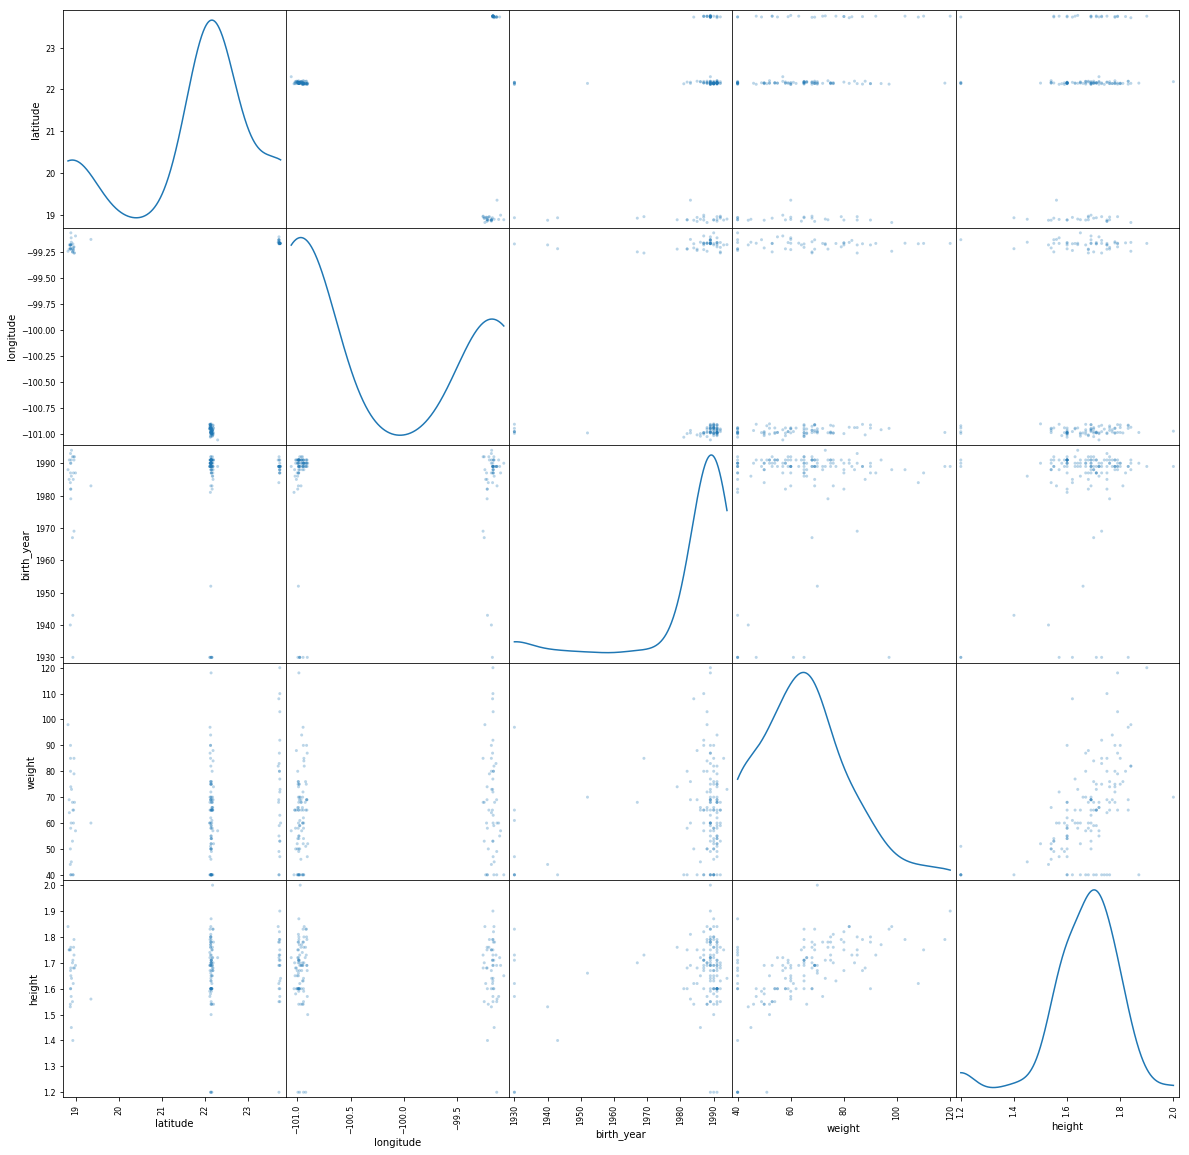

In [78]:
# #Scatter matrix for continuous values in the user dataset
pd.plotting.scatter_matrix(cons_profile, alpha = 0.3, figsize = (20,20), diagonal = 'kde')
# #From the graph below, we know that there's a correlation between weight and height and therefore we can remove one of them.

The above graph shows that the weight and height are correlated to each other and hence we drop height as it makes no significant impact on the recommendation.

In [0]:
# #Remove Height since it shows high correlation with Weight
cons_profile = cons_profile.drop('height', axis = 1)

# Checking and replacing missing values in the datasets
## Restaurant Dataset
- The below code gives True if any of the attributes have missing values and False otherwise

In [80]:
print('Customer:\n',cons_profile.isin(['?']).any())

Customer:
 userID              False
latitude            False
longitude           False
smoker               True
drink_level         False
dress_preference     True
ambience             True
transport            True
marital_status       True
hijos                True
birth_year          False
interest            False
personality         False
religion            False
activity             True
color               False
weight              False
budget               True
dtype: bool


##  User Dataset
- We store indices of features having 'Nan' or '?' values
- Then, we put all the values with missing attributes into the missing list

In [0]:
indices = set() #to store unique values
for index,row in cons_profile.iterrows():
    for i in range(len(row)):
        if row[i] is np.nan or row [i] is '?':
            indices.add(i)

In [82]:
#Features having 'Nan' or '?' values
missing = list(cons_profile.columns[list(indices)])
print(missing)

['smoker', 'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos', 'activity', 'budget']


Only the features with categorical data have missing values.

Hence, we replace 'Nan' or '?' values with a random value from the feature

In [83]:
import random 
for attr in missing:
    uni = list(cons_profile[attr].unique()) #List of all unique values in the feature
    if '?' in uni:
        uni.remove('?') #remove '?' if present in the list
    if np.nan in uni:
        uni.remove(np.nan) #remove 'Nan' if present in the list
    i=0
    for value in cons_profile[attr]: 
        if value is np.nan or value is '?':
            cons_profile[attr][i] = cons_profile[attr][i].replace(value,random.choice(uni)) #replace it with a random item from the list
        i+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


# Encoding String/Object type data into Integer

In [0]:
data = cons_profile.copy()
data = data.drop('userID', axis = 1)

We use Label Encoding to encode the letter/word data and convert it into numbers

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['smoker'] = le.fit_transform(data['smoker'])
data['drink_level'] = le.fit_transform(data['drink_level'])
data['dress_preference'] = le.fit_transform(data['dress_preference'])
data['ambience'] = le.fit_transform(data['ambience'])
data['transport'] = le.fit_transform(data['transport'])
data['marital_status'] = le.fit_transform(data['marital_status'])
data['hijos'] = le.fit_transform(data['hijos'])
data['interest'] = le.fit_transform(data['interest'])
data['personality'] = le.fit_transform(data['personality'])
data['religion'] = le.fit_transform(data['religion'])
data['activity'] = le.fit_transform(data['activity'])
data['color'] = le.fit_transform(data['color'])
data['budget'] = le.fit_transform(data['budget'])
data['longitude'] = le.fit_transform(data['longitude'])
data['latitude'] = le.fit_transform(data['latitude'])

# Splitting Data into Train and Test Datasets
- Here, we shuffle the data and randomly split the data into train and test set
- We make sure that the Test set contains roughly 10% and Train set contains roughly 90% of original dataset

In [86]:
from sklearn.utils import shuffle
data = shuffle(data)
test_size = np.random.rand(len(data)) < 0.9
cons_train = data[test_size]
cons_test = data[~test_size]
print(len(cons_train))
print(len(cons_test))

128
10


## Choosing a Sample to make a recommendation
We first obtain a random index from the Test dataset(cons_test)

In [0]:
train_users = []
for index,row in cons_train.iterrows():
    train_users.append(index)
test_users = []
for index,row in cons_test.iterrows():
    test_users.append(index)

sample_user_index = random.choice(test_users)

Then, we store the entire row of details of that user corresponding to the index, obtained above, in the test variable

In [0]:
for index,row in cons_test.iterrows():
    if index == sample_user_index:
        test = pd.DataFrame(row.values.reshape(1,17))

# Getting Recommendation from the Model
- We use KDTree model to obtain similarity of the various features among different users with the query user(test user)
- The KDTree uses Euclidian Distance formulae to obtain these similarity values

In [0]:
from sklearn.neighbors import KDTree
tree = KDTree(cons_train)
dist, ind = tree.query(test, k=len(cons_train))
val = []
for i in ind:
    for j in i:
        val.append(j)
i = 0

# res is a dataFrame to store the details of user that was recommended by KDTree 
res = pd.DataFrame()
for index,row in cons_train.iterrows():
    if i in val:
        res = res.append(row)
    i+=1

In [0]:
# percentage similarity between the users
dist = dist.reshape(len(cons_train),)
dist = (1 - (dist-dist.min())/(dist.max()-dist.min()))*100 

In [91]:
print(dist[:5])

[100.          98.40883622  98.40883622  96.14612503  94.95557234]


In [0]:
# top 5 similar users with their userID and percentage of similarity
res = res[:5]
res['percent'] = dist[:5]

In [93]:
res

,activity,ambience,birth_year,budget,color,dress_preference,drink_level,hijos,interest,latitude,longitude,marital_status,personality,religion,smoker,transport,weight,percent
40,0.0,1.0,1985.0,2.0,6.0,3.0,0.0,1.0,0.0,18.0,81.0,1.0,2.0,0.0,0.0,1.0,40.0,100.000000
68,0.0,0.0,1983.0,2.0,0.0,3.0,2.0,1.0,4.0,25.0,121.0,1.0,3.0,0.0,0.0,2.0,60.0,98.408836
78,2.0,0.0,1992.0,2.0,0.0,1.0,0.0,1.0,3.0,15.0,79.0,1.0,3.0,0.0,0.0,2.0,53.0,98.408836
30,2.0,2.0,1992.0,2.0,6.0,2.0,0.0,2.0,1.0,111.0,114.0,0.0,1.0,0.0,0.0,1.0,40.0,96.146125
130,1.0,1.0,1990.0,2.0,0.0,3.0,2.0,2.0,0.0,42.0,71.0,0.0,1.0,4.0,1.0,0.0,90.0,94.955572


In [0]:
ind = [] # indices of the top 5 similar users
for index,row in res.iterrows():
    ind.append(index)

In [0]:
per = [] # percentage of similarity of the top 5 users
for index,row in res.iterrows():
    per.append(row[17])

In [96]:
ind_per = {} # dictionary with the key - indices, value - percent
for i in range(len(ind)):
    ind_per[ind[i]] = per[i]
print(ind_per)

{40: 100.0, 68: 98.40883621781329, 78: 98.40883621781329, 30: 96.14612502713737, 130: 94.95557234258185}


In [0]:
ids = {} # dictionary to map the userID with the percent corresponding to the indices
for index,row in cons_profile.iterrows():
    if index in ind:
        ids[row[0]] = ind_per[index]

In [98]:
print(ids)

{'U1031': 96.14612502713737, 'U1041': 100.0, 'U1069': 98.40883621781329, 'U1079': 98.40883621781329, 'U1131': 94.95557234258185}


In [99]:
"""
This is a function takes as parameters IDs of similar users.
Computes the average ratings provided by the them.
Obtains the top rated restaurants (restaurants with highest average rating).
The return value shall be the dictionary with key - placeID and value - recommendation percentage.

"""
def recommendation(ids):
    """Function that recommends the provided user with a list of top rated restaurants"""
    recommend = {}
    all_rest = pd.DataFrame()
    for index,row in rating.iterrows():
        if row[0] in ids:
            all_rest = all_rest.append(row)
            all_rest.loc[index, 'Percent'] = ids[row[0]]
    
    all_rest['avg'] = (all_rest['rating'] + all_rest['food_rating'] + all_rest['service_rating']) / 3
    res = all_rest.groupby(['placeID'])[['Percent','avg']].max()
    res = res.sort_values(['Percent','avg'],ascending = False)
    res.drop('avg',axis = 1, inplace = True)
    for placeid in res.index:
         recommend[placeid] = res.get_value(placeid, 'Percent')
    return recommend
help(recommendation)

Help on function recommendation in module __main__:

recommendation(ids)
    Function that recommends the provided user with a list of top rated restaurants



In [100]:
recommend = recommendation(ids)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [0]:
result = pd.DataFrame() # final dataframe which comprises of the restaurant details along with the placeID and percent.
percent = []
for index,row in rest_geo.iterrows():
    if row[0] in recommend.keys():
        result = result.append(row)
        percent.append(recommend[row[0]])      
result['Recommendation Percentage'] = percent

In [0]:
result = result[['placeID','name','latitude','longitude','price','Recommendation Percentage']]

In [103]:
result.sort_values(by=['Recommendation Percentage'], ascending = False, inplace = True)
result

,placeID,name,latitude,longitude,price,Recommendation Percentage
48,135001.0,Vips,18.941859,-99.241927,medium,100.000000
22,134983.0,Restaurant and Bar and Clothesline Carlos N Ch...,18.948657,-99.235361,high,100.000000
64,135021.0,Subway,18.933537,-99.222497,low,100.000000
38,134992.0,Restaurant Teely,18.936683,-99.247366,high,100.000000
26,132768.0,Mariscos Tia Licha,18.925773,-99.232636,medium,100.000000
127,135109.0,Paniroles,18.921785,-99.235350,medium,100.000000
23,132851.0,KFC,22.136872,-100.934574,low,98.408836
11,135069.0,Abondance Restaurante Bar,22.140129,-100.944872,low,98.408836
114,132766.0,Mikasa,18.910178,-99.231544,medium,98.408836
112,134986.0,Restaurant Las Mananitas,18.928798,-99.239513,high,98.408836


In [104]:
# obtaining the userID for which the above restaurants have been recommended.
for index,row in cons_profile.iterrows(): 
    if index is sample_user_index:
        sample_userID = cons_profile.userID[index]
print("The list of restaurants are being recommended to the user", sample_userID)        

The list of restaurants are being recommended to the user U1127
